In [ ]:
#SVM-Example-Altman


In [1]:
#Import Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Read the file
mydata=pd.read_csv("Altman-Data.csv")
mydata.head()


,Company,WCTA,RETA,EBITTA,MVEBVTD,SATA,Status
0,1,36.7,-62.8,-89.5,54.1,1.7,Bankrupt
1,2,24.0,3.3,-3.5,20.9,1.1,Bankrupt
2,3,-61.6,-120.8,-103.2,24.7,2.5,Bankrupt
3,4,-1.0,-18.1,-28.8,36.2,1.1,Bankrupt
4,5,18.9,-3.8,-50.6,26.4,0.9,Bankrupt


In [3]:
#Convert Target Group Variable into 0/1 format
mydata["Status"]=(mydata["Status"]=="Solvent").astype(int)
mydata


,Company,WCTA,RETA,EBITTA,MVEBVTD,SATA,Status
0,1,36.7,-62.8,-89.5,54.1,1.7,0
1,2,24.0,3.3,-3.5,20.9,1.1,0
2,3,-61.6,-120.8,-103.2,24.7,2.5,0
3,4,-1.0,-18.1,-28.8,36.2,1.1,0
4,5,18.9,-3.8,-50.6,26.4,0.9,0
...,...,...,...,...,...,...,...
61,62,48.3,53.1,7.1,164.4,1.9,1
62,63,46.7,39.8,13.8,229.1,1.2,1
63,64,60.3,59.5,7.0,226.6,2.0,1
64,65,17.9,16.3,20.4,105.6,1.0,1


In [4]:
#Define X and Y
X=mydata.iloc[:,1:6]
Y=mydata["Status"]


In [5]:
#Build the SVM Model for linear kernel
svc_model=SVC(kernel="linear",probability=True)
SVM1=svc_model.fit(X,Y)
SVM1
weight=SVM1.coef_
print(weight)
Intercept=SVM1.intercept_
print(Intercept)
print(SVM1)
SVM_Scores=(SVM1.decision_function(X))
SVM_Scores=pd.DataFrame(SVM_Scores)
SVM_Scores.columns=["Scores"]
SVM_Scores


[[0.23346518 0.17236673 0.49461813 0.04171603 0.04454429]]
[-7.6240997]
SVC(kernel='linear', probability=True)


,Scores
0,-51.816318
1,-2.262425
2,-92.730300
3,-23.663286
4,-27.752886
...,...
61,23.259480
62,26.575246
63,29.713939
64,13.904472


In [6]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X)
print("Accuracy=","{:.4f}".format(accuracy_score(Y,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y,Prediction)))


Accuracy= 1.0000
Recall= 1.0000
Precision 1.0000


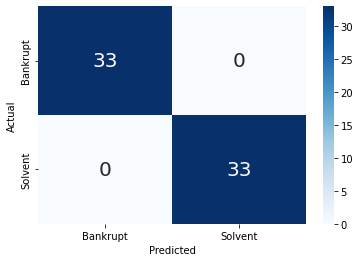

In [7]:
#Getting Confusion Matrix
confusion=confusion_matrix(Y,Prediction)
sns.heatmap(confusion,annot=True,cmap="Blues",annot_kws={"size":20},
           xticklabels=["Bankrupt","Solvent"],
           yticklabels=["Bankrupt","Solvent"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [8]:
#Getting Probabilities
Probability=SVM1.predict_proba(X)
Probability=pd.DataFrame(Probability)
Probability


,0,1
0,0.999999,1.242995e-06
1,0.719001,2.809989e-01
2,1.000000,1.000000e-07
3,0.998349,1.651046e-03
4,0.999419,5.808504e-04
...,...,...
61,0.003758,9.962418e-01
62,0.000008,9.999921e-01
63,0.000002,9.999984e-01
64,0.039498,9.605019e-01


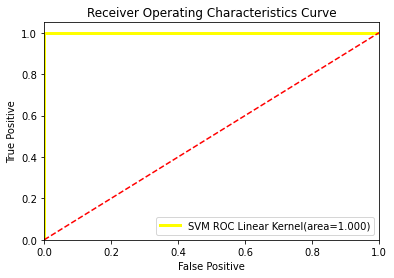

In [11]:
#ROC Curve
svmroc=roc_auc_score(Y,Prediction)
fpr,tpr,thresholds=roc_curve(Y,Probability[1])
plt.figure()
plt.plot(fpr,tpr,color="yellow",lw=3,label="SVM ROC Linear Kernel(area=%0.3f)" %svmroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()


In [10]:
#Correlation
mydata["Scores"]=SVM_Scores
print(mydata.head())
Data=mydata.iloc[:,1:6]
Data["Scores"]=mydata["Scores"] 
Data.corr()


   Company  WCTA   RETA  EBITTA  MVEBVTD  SATA  Status     Scores
0        1  36.7  -62.8   -89.5     54.1   1.7       0 -51.816318
1        2  24.0    3.3    -3.5     20.9   1.1       0  -2.262425
2        3 -61.6 -120.8  -103.2     24.7   2.5       0 -92.730300
3        4  -1.0  -18.1   -28.8     36.2   1.1       0 -23.663286
4        5  18.9   -3.8   -50.6     26.4   0.9       0 -27.752886


,WCTA,RETA,EBITTA,MVEBVTD,SATA,Scores
WCTA,1.000000,0.750183,0.236639,0.422045,0.336255,0.666668
RETA,0.750183,1.000000,0.640871,0.472480,0.046741,0.906826
EBITTA,0.236639,0.640871,1.000000,0.376509,-0.350012,0.850131
MVEBVTD,0.422045,0.472480,0.376509,1.000000,0.088242,0.630404
SATA,0.336255,0.046741,-0.350012,0.088242,1.000000,-0.074843
Scores,0.666668,0.906826,0.850131,0.630404,-0.074843,1.000000
